In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
lat              0.063632
long            -0.022509
id              -0.034184
Name: price, dtype: float64

In [6]:
df2 = pd.read_csv('../data/mortgage_rates.csv',skiprows=4)

In [7]:
df2.head()

,.frq,Week
0,1 APR 1971,7.33
1,8 APR 1971,7.31
2,15 APR 1971,7.31
3,22 APR 1971,7.31
4,29 APR 1971,7.29


In [8]:
df2.rename(columns={'.frq':'week','Week':'rate'},inplace=True)

In [9]:
df2.head()

,week,rate
0,1 APR 1971,7.33
1,8 APR 1971,7.31
2,15 APR 1971,7.31
3,22 APR 1971,7.31
4,29 APR 1971,7.29


In [10]:
df2['week'] = pd.to_datetime(df2['week'],infer_datetime_format=True)

In [11]:
df2.head()

,week,rate
0,1971-04-01,7.33
1,1971-04-08,7.31
2,1971-04-15,7.31
3,1971-04-22,7.31
4,1971-04-29,7.29


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   week    2707 non-null   datetime64[ns]
 1   rate    2707 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 42.4 KB


In [13]:
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [15]:
df3 = pd.merge_asof(df.sort_values('date'),df2,left_on='date',right_on='week',direction='forward')

In [16]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,week,rate
0,6147650060,2021-06-10,543250.0,4,2.5,2730,4545,2.0,NO,NO,...,0,410,110,2005,0,"24235 181st Place Southeast, Covington, Washin...",47.384405,-122.100120,2021-06-10,2.96
1,7208700130,2021-06-10,2430000.0,5,4.5,4100,10229,2.0,NO,NO,...,0,630,140,2016,0,"21728 Southeast 3rd Place, Sammamish, Washingt...",47.606355,-122.051430,2021-06-10,2.96
2,3392900195,2021-06-10,1100000.0,5,1.5,1930,6120,1.5,NO,NO,...,900,0,0,1911,0,"1144 North 83rd Street, Seattle, Washington 98...",47.689320,-122.342430,2021-06-10,2.96
3,871000345,2021-06-10,1862000.0,4,2.5,2950,5102,2.0,NO,NO,...,1120,240,475,1939,0,"3422 37th Avenue West, Seattle, Washington 981...",47.651185,-122.404365,2021-06-10,2.96
4,2787320680,2021-06-10,475000.0,4,1.5,1310,7770,1.0,NO,NO,...,0,420,0,1980,0,"12619 Southeast 215th Street, Kent, Washington...",47.409160,-122.172400,2021-06-10,2.96


In [17]:
df3.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,week,rate
30150,3211200320,2022-06-08,675000.0,3,2.0,2100,7500,1.0,NO,NO,...,0,310,100,1971,0,"14248 77th Avenue Northeast, Kirkland, Washing...",47.731360,-122.237795,2022-06-09,5.23
30151,3024079089,2022-06-08,1250000.0,4,2.5,1750,95396,2.0,NO,NO,...,0,540,490,1993,0,"28701 Southeast 67th Street, Issaquah, Washing...",47.540410,-121.958620,2022-06-09,5.23
30152,7345600812,2022-06-08,750000.0,3,2.5,1910,7909,2.0,NO,NO,...,0,650,80,2017,0,"12611 37th Avenue South, Tukwila, Washington 9...",47.489590,-122.287120,2022-06-09,5.23
30153,739800280,2022-06-08,757500.0,3,2.5,1910,9170,2.0,NO,NO,...,0,480,270,1984,0,"21935 110th Avenue Southeast, Kent, Washington...",47.404900,-122.194905,2022-06-09,5.23
30154,5491460030,2022-06-09,790000.0,3,2.5,1880,3600,2.0,NO,NO,...,0,380,60,2002,0,"24715 232nd Place Southeast, Maple Valley, Was...",47.380325,-122.031835,2022-06-09,5.23


In [18]:
df['date'].max()

Timestamp('2022-06-09 00:00:00')

In [19]:
df3.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
rate             0.081519
lat              0.063632
long            -0.022509
id              -0.034184
Name: price, dtype: float64

In [20]:
df3['address'].str.split(',').str[1].str.strip()

0           Covington
1           Sammamish
2             Seattle
3             Seattle
4                Kent
             ...     
30150        Kirkland
30151        Issaquah
30152         Tukwila
30153            Kent
30154    Maple Valley
Name: address, Length: 30155, dtype: object

In [21]:
df3['city'] = df3['address'].str.split(',').str[1].str.strip()

In [22]:
df3['city'].value_counts()

Seattle             9368
Renton              1946
Kent                1583
Bellevue            1530
Auburn              1513
                    ... 
Sault Ste. Marie       1
Saint George           1
Everett                1
Lakeland North         1
Nehawka                1
Name: city, Length: 323, dtype: int64

In [23]:
df3['zipcode'] = df3['address'].str.split(',').str[-2].str[-5:]

In [24]:
df3['zipcode'].value_counts()

98042    992
98038    858
98115    761
98103    761
98117    748
        ... 
61264      1
58212      1
68632      1
55912      1
02149      1
Name: zipcode, Length: 399, dtype: int64

In [25]:
df_irs = pd.read_csv('../data/income_by_zip.csv')

In [26]:
df_irs.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2161370.0,982450.0,749300.0,379640.0,2007020.0,48290.0,...,41850.0,164114.0,406560.0,2125822.0,1696840.0,5796626.0,1664160.0,5209274.0,37960.0,520722.0
1,1,AL,35004,0,5420.0,2450.0,2060.0,790.0,5060.0,130.0,...,30.0,68.0,1050.0,3330.0,4250.0,12422.0,4190.0,11876.0,50.0,201.0
2,1,AL,35005,0,3440.0,1650.0,800.0,900.0,3150.0,90.0,...,0.0,0.0,530.0,1452.0,2820.0,8689.0,2810.0,8637.0,0.0,0.0
3,1,AL,35006,0,1230.0,520.0,550.0,150.0,1170.0,30.0,...,0.0,0.0,210.0,525.0,1000.0,2979.0,990.0,2947.0,0.0,0.0
4,1,AL,35007,0,12600.0,5380.0,5080.0,1770.0,11500.0,380.0,...,130.0,169.0,2880.0,9991.0,9400.0,27302.0,9290.0,26368.0,150.0,917.0


In [27]:
df_wa = df_irs.loc[df_irs['STATE'] == 'WA',['STATE','ZIPCODE','N02650','A02650']]

In [28]:
df_wa.head()

,STATE,ZIPCODE,N02650,A02650
25914,WA,0,3729540.0,373536130.0
25915,WA,98001,17680.0,1403028.0
25916,WA,98002,17490.0,905363.0
25917,WA,98003,23630.0,1407335.0
25918,WA,98004,19580.0,8096083.0


In [29]:
df_wa['avg_inc'] = df_wa['A02650']/df_wa['N02650']

In [30]:
df_wa.head()

,STATE,ZIPCODE,N02650,A02650,avg_inc
25914,WA,0,3729540.0,373536130.0,100.156086
25915,WA,98001,17680.0,1403028.0,79.356787
25916,WA,98002,17490.0,905363.0,51.764608
25917,WA,98003,23630.0,1407335.0,59.557131
25918,WA,98004,19580.0,8096083.0,413.487385


In [31]:
df_wa['avg_inc'].describe()

count     501.000000
mean       87.560310
std        81.015645
min        27.251055
25%        59.439394
50%        70.984430
75%        90.751207
max      1538.235762
Name: avg_inc, dtype: float64

In [32]:
df_wa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 25914 to 26414
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATE    501 non-null    object 
 1   ZIPCODE  501 non-null    int64  
 2   N02650   501 non-null    float64
 3   A02650   501 non-null    float64
 4   avg_inc  501 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 23.5+ KB


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [34]:
df3['zipcode'] = df3['zipcode'].astype(int)

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [36]:
df5 = df3.merge(df_wa,left_on='zipcode',right_on='ZIPCODE',how='inner')

In [37]:
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,long,week,rate,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc
0,6147650060,2021-06-10,543250.0,4,2.5,2730,4545,2.0,NO,NO,...,-122.100120,2021-06-10,2.96,Covington,98042,WA,98042,24330.0,2183182.0,89.7321
1,2422059158,2021-06-10,632000.0,3,1.0,1150,43200,1.0,NO,NO,...,-122.122340,2021-06-10,2.96,Kent,98042,WA,98042,24330.0,2183182.0,89.7321
2,3422059068,2021-06-10,801000.0,4,2.5,2320,49658,2.0,NO,NO,...,-122.156520,2021-06-10,2.96,Kent,98042,WA,98042,24330.0,2183182.0,89.7321
3,6699001020,2021-06-10,660000.0,5,2.5,3220,5025,2.0,NO,NO,...,-122.104855,2021-06-10,2.96,Covington,98042,WA,98042,24330.0,2183182.0,89.7321
4,5464350020,2021-06-11,747895.0,4,4.0,3160,4860,2.5,NO,NO,...,-122.162420,2021-06-17,2.93,Kent,98042,WA,98042,24330.0,2183182.0,89.7321


<AxesSubplot:ylabel='Frequency'>

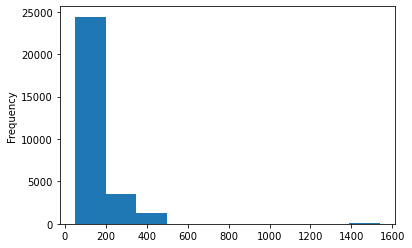

In [38]:
df5['avg_inc'].plot(kind='hist')

In [39]:
df5.loc[df5['avg_inc'] == df5['avg_inc'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,long,week,rate,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc
29130,2425049122,2021-06-22,7000000.0,3,2.5,2740,18051,2.0,YES,NO,...,-122.240368,2021-06-24,3.02,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29131,2525049204,2021-06-25,5500000.0,5,6.5,4540,10650,2.0,NO,NO,...,-122.235372,2021-07-01,2.98,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29132,5426300035,2021-07-06,1950000.0,4,3.0,2060,9542,1.0,NO,NO,...,-122.232935,2021-07-08,2.90,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29133,3262300695,2021-07-13,4000000.0,4,4.0,4020,8119,2.0,NO,NO,...,-122.236240,2021-07-15,2.88,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29134,2525049092,2021-07-14,2525000.0,1,1.0,410,19602,1.0,NO,NO,...,-122.237540,2021-07-15,2.88,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29135,9208900006,2021-07-15,10000000.0,3,4.5,4820,20286,2.0,NO,NO,...,-122.240590,2021-07-15,2.88,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29136,3835503090,2021-07-16,13425000.0,5,5.0,7140,24443,2.0,YES,NO,...,-122.222763,2021-07-22,2.78,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29137,5425700255,2021-07-19,2400000.0,4,2.5,2100,8750,1.0,NO,NO,...,-122.231760,2021-07-22,2.78,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29138,4389200870,2021-07-26,4550000.0,1,1.0,560,15300,1.0,NO,NO,...,-122.223810,2021-07-29,2.80,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762
29139,3738000020,2021-08-02,3652000.0,4,3.0,3910,14805,1.0,NO,NO,...,-122.223515,2021-08-05,2.77,Medina,98039,WA,98039,1510.0,2322736.0,1538.235762


In [40]:
df5_ex_med = df5.loc[df5['city'] != 'Medina']

In [41]:
df5_ex_med['avg_inc'].describe()

count    29161.000000
mean       144.430787
std         78.795264
min         50.833374
25%         85.709677
50%        125.553631
75%        172.246538
max        413.487385
Name: avg_inc, dtype: float64

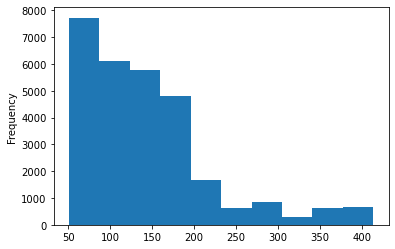

In [42]:
df5_ex_med['avg_inc'].plot(kind='hist');

In [43]:
df5.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.616508
avg_inc          0.558251
sqft_above       0.545989
bathrooms        0.487772
A02650           0.427276
sqft_patio       0.317641
lat              0.297085
bedrooms         0.290936
sqft_garage      0.267449
sqft_basement    0.246254
floors           0.199094
yr_built         0.105600
sqft_lot         0.086611
yr_renovated     0.086160
long             0.077402
rate             0.074174
id              -0.030299
N02650          -0.081973
zipcode         -0.101847
ZIPCODE         -0.101847
Name: price, dtype: float64

In [44]:
df5_ex_med.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.616342
avg_inc          0.567030
sqft_above       0.546463
bathrooms        0.487344
A02650           0.445225
sqft_patio       0.316046
lat              0.303526
bedrooms         0.294720
sqft_garage      0.268397
sqft_basement    0.244779
floors           0.204042
yr_built         0.107250
sqft_lot         0.089186
yr_renovated     0.084216
long             0.081820
rate             0.078869
id              -0.030897
N02650          -0.061993
zipcode         -0.099233
ZIPCODE         -0.099233
Name: price, dtype: float64

In [45]:
y = df5['price']
x = df5[['avg_inc','sqft_living','rate']]
model = sm.OLS(y,sm.add_constant(x)).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                 1.149e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:39   Log-Likelihood:            -4.3054e+05
No. Observations:               29220   AIC:                         8.611e+05
Df Residuals:                   29216   BIC:                         8.611e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.186e+05   1.73e+04    -41.465      0.000   -7.53e+05   -6.85e+05
avg_inc      3659.2788     36.983     98.945      0.000    3586.790    3731.767
sqft_living   453.7615      3.806    119.217      0.000     446.301     461.222
rate         9.246e+04   4150.160     22.279      0.000    8.43e+04    1.01e+05
==============================================================================
Omnibus:                    48833.641   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        138725998.617
Skew:                          10.844   Prob(JB):                         0.00
Kurtosis:                     339.857   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
df5.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,yr_built,yr_renovated,lat,long,rate,zipcode,ZIPCODE,N02650,A02650,avg_inc
id,1.000000,-0.030299,-0.004975,-0.012023,-0.027806,-0.120841,0.034486,-0.022488,-0.015396,-0.007268,...,0.022280,-0.029346,-0.000691,0.007479,-0.009833,-0.003974,-0.003974,0.014663,-0.001153,-0.009713
price,-0.030299,1.000000,0.290936,0.487772,0.616508,0.086611,0.199094,0.545989,0.246254,0.267449,...,0.105600,0.086160,0.297085,0.077402,0.074174,-0.101847,-0.101847,-0.081973,0.427276,0.558251
bedrooms,-0.004975,0.290936,1.000000,0.594390,0.631757,-0.002348,0.194884,0.538766,0.235132,0.306365,...,0.182495,0.011060,-0.014765,0.122648,-0.021352,-0.158141,-0.158141,-0.015412,0.098665,0.119337
bathrooms,-0.012023,0.487772,0.594390,1.000000,0.780119,0.036647,0.427297,0.681399,0.260470,0.461468,...,0.455911,0.043242,0.048523,0.168037,-0.036021,-0.168742,-0.168742,-0.062567,0.171036,0.236940
sqft_living,-0.027806,0.616508,0.631757,0.780119,1.000000,0.115778,0.354992,0.881976,0.335631,0.504276,...,0.328574,0.036222,0.050090,0.217207,-0.019575,-0.186649,-0.186649,-0.118861,0.184474,0.299414
sqft_lot,-0.120841,0.086611,-0.002348,0.036647,0.115778,1.000000,-0.021533,0.126290,0.001080,0.083839,...,0.011964,0.008750,-0.073890,0.167536,-0.004204,-0.097416,-0.097416,-0.117931,-0.073248,0.007077
floors,0.034486,0.199094,0.194884,0.427297,0.354992,-0.021533,1.000000,0.504478,-0.243480,0.178802,...,0.522164,-0.015760,0.046422,0.090788,-0.021324,-0.020815,-0.020815,-0.032250,0.077702,0.099139
sqft_above,-0.022488,0.545989,0.538766,0.681399,0.881976,0.126290,0.504478,1.000000,-0.073624,0.554377,...,0.427904,0.007793,-0.020750,0.314465,-0.015448,-0.255371,-0.255371,-0.140651,0.140126,0.267662
sqft_basement,-0.015396,0.246254,0.235132,0.260470,0.335631,0.001080,-0.243480,-0.073624,1.000000,0.017167,...,-0.227178,0.053133,0.187561,-0.207673,-0.004512,0.154308,0.154308,0.036964,0.130096,0.110009
sqft_garage,-0.007268,0.267449,0.306365,0.461468,0.504276,0.083839,0.178802,0.554377,0.017167,1.000000,...,0.495722,-0.103892,-0.127534,0.351505,-0.004948,-0.350359,-0.350359,-0.057183,0.068671,0.132663


In [48]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29220 entries, 0 to 29219
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29220 non-null  int64         
 1   date           29220 non-null  datetime64[ns]
 2   price          29220 non-null  float64       
 3   bedrooms       29220 non-null  int64         
 4   bathrooms      29220 non-null  float64       
 5   sqft_living    29220 non-null  int64         
 6   sqft_lot       29220 non-null  int64         
 7   floors         29220 non-null  float64       
 8   waterfront     29220 non-null  object        
 9   greenbelt      29220 non-null  object        
 10  nuisance       29220 non-null  object        
 11  view           29220 non-null  object        
 12  condition      29220 non-null  object        
 13  grade          29220 non-null  object        
 14  heat_source    29194 non-null  object        
 15  sewer_system   2920

In [49]:
df['date'].describe(datetime_is_numeric=True)

count                            30155
mean     2021-11-21 01:02:13.351019776
min                2021-06-10 00:00:00
25%                2021-08-18 00:00:00
50%                2021-11-03 00:00:00
75%                2022-03-07 00:00:00
max                2022-06-09 00:00:00
Name: date, dtype: object

<AxesSubplot:xlabel='date', ylabel='rate'>

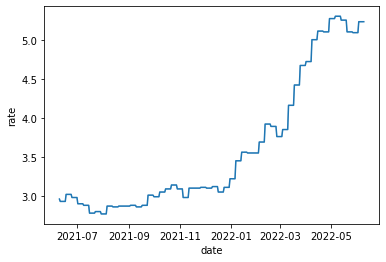

In [50]:
sns.lineplot(x=df5['date'],y=df5['rate'])

<AxesSubplot:xlabel='date', ylabel='price'>

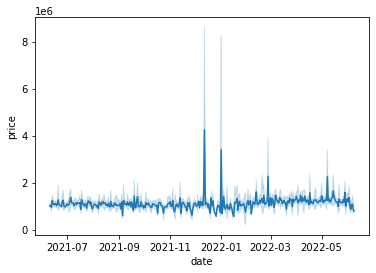

In [51]:
sns.lineplot(x=df5['date'],y=df5['price'])

In [52]:
df5['month'] = pd.DatetimeIndex(df5['date']).month

In [53]:
df5['year'] = pd.DatetimeIndex(df5['date']).year

In [54]:
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,rate,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year
0,6147650060,2021-06-10,543250.0,4,2.5,2730,4545,2.0,NO,NO,...,2.96,Covington,98042,WA,98042,24330.0,2183182.0,89.7321,6,2021
1,2422059158,2021-06-10,632000.0,3,1.0,1150,43200,1.0,NO,NO,...,2.96,Kent,98042,WA,98042,24330.0,2183182.0,89.7321,6,2021
2,3422059068,2021-06-10,801000.0,4,2.5,2320,49658,2.0,NO,NO,...,2.96,Kent,98042,WA,98042,24330.0,2183182.0,89.7321,6,2021
3,6699001020,2021-06-10,660000.0,5,2.5,3220,5025,2.0,NO,NO,...,2.96,Covington,98042,WA,98042,24330.0,2183182.0,89.7321,6,2021
4,5464350020,2021-06-11,747895.0,4,4.0,3160,4860,2.5,NO,NO,...,2.93,Kent,98042,WA,98042,24330.0,2183182.0,89.7321,6,2021


In [55]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29220 entries, 0 to 29219
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29220 non-null  int64         
 1   date           29220 non-null  datetime64[ns]
 2   price          29220 non-null  float64       
 3   bedrooms       29220 non-null  int64         
 4   bathrooms      29220 non-null  float64       
 5   sqft_living    29220 non-null  int64         
 6   sqft_lot       29220 non-null  int64         
 7   floors         29220 non-null  float64       
 8   waterfront     29220 non-null  object        
 9   greenbelt      29220 non-null  object        
 10  nuisance       29220 non-null  object        
 11  view           29220 non-null  object        
 12  condition      29220 non-null  object        
 13  grade          29220 non-null  object        
 14  heat_source    29194 non-null  object        
 15  sewer_system   2920

In [56]:
list_1 = [*range(6,13)]
list_2 = [*range(1,8)]
dict_2021 = dict(zip(list_1,list_2))
dict_2021

{6: 1, 7: 2, 8: 3, 9: 4, 10: 5, 11: 6, 12: 7}

In [57]:
list_3 = [*range(1,7)]
list_4 = [*range(8,14)]
dict_2022 = dict(zip(list_3,list_4))
dict_2022

{1: 8, 2: 9, 3: 10, 4: 11, 5: 12, 6: 13}

In [58]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29220 entries, 0 to 29219
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29220 non-null  int64         
 1   date           29220 non-null  datetime64[ns]
 2   price          29220 non-null  float64       
 3   bedrooms       29220 non-null  int64         
 4   bathrooms      29220 non-null  float64       
 5   sqft_living    29220 non-null  int64         
 6   sqft_lot       29220 non-null  int64         
 7   floors         29220 non-null  float64       
 8   waterfront     29220 non-null  object        
 9   greenbelt      29220 non-null  object        
 10  nuisance       29220 non-null  object        
 11  view           29220 non-null  object        
 12  condition      29220 non-null  object        
 13  grade          29220 non-null  object        
 14  heat_source    29194 non-null  object        
 15  sewer_system   2920

In [59]:
df5['month_num'] = np.where(df5['year'] == 2021,(df5['month'] - 5),(df5['month'] + 7)) 

In [60]:
df5.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,city,zipcode,STATE,ZIPCODE,N02650,A02650,avg_inc,month,year,month_num
29215,2254501590,2022-02-02,999950.0,2,2.0,1330,1318,2.0,NO,NO,...,Puyallup,98372,WA,98372,12900.0,1088270.0,84.362016,2,2022,9
29216,2254501591,2022-03-03,815000.0,2,2.0,1170,638,2.0,NO,NO,...,Puyallup,98372,WA,98372,12900.0,1088270.0,84.362016,3,2022,10
29217,1703400362,2022-02-15,879000.0,3,2.0,1610,1005,3.5,NO,NO,...,Spokane,99223,WA,99223,16340.0,1647882.0,100.849572,2,2022,9
29218,8924100370,2022-04-04,2375000.0,4,3.5,3590,5335,2.0,NO,NO,...,Marysville,98270,WA,98270,25790.0,1825543.0,70.784917,4,2022,11
29219,1021039039,2022-05-02,312750.0,3,2.0,2480,6615,2.0,NO,NO,...,Dash Point,98422,WA,98422,10690.0,1077040.0,100.752105,5,2022,12


In [61]:
time_dummies = pd.get_dummies(data=df5,columns=['month_num'],drop_first=True)

In [62]:
time_dummies.iloc[:,-12:]

,month_num_2,month_num_3,month_num_4,month_num_5,month_num_6,month_num_7,month_num_8,month_num_9,month_num_10,month_num_11,month_num_12,month_num_13
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29215,0,0,0,0,0,0,0,1,0,0,0,0
29216,0,0,0,0,0,0,0,0,1,0,0,0
29217,0,0,0,0,0,0,0,1,0,0,0,0
29218,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
y_dum = time_dummies['price']
x_dum = pd.concat([time_dummies[['avg_inc','sqft_living']],time_dummies.iloc[:,-12:]],axis=1)
model = sm.OLS(y,sm.add_constant(x_dum)).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     2476.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:27:50   Log-Likelihood:            -4.3049e+05
No. Observations:               29220   AIC:                         8.610e+05
Df Residuals:                   29205   BIC:                         8.611e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.878e+05    1.5e+04    -32.548      0.000   -5.17e+05   -4.58e+05
avg_inc       3658.5075     36.939     99.041      0.000    3586.105    3730.910
sqft_living    454.7770      3.804    119.547      0.000     447.321     462.233
month_num_2   2.746e+04   1.64e+04      1.677      0.094   -4636.557    5.96e+04
month_num_3   1.288e+04   1.64e+04      0.786      0.432   -1.92e+04     4.5e+04
month_num_4   2.201e+04   1.68e+04      1.310      0.190   -1.09e+04    5.49e+04
month_num_5   3.735e+04   1.69e+04      2.206      0.027    4160.175    7.05e+04
month_num_6   6.065e+04   1.74e+04      3.488      0.000    2.66e+04    9.47e+04
month_num_7   7.764e+04   1.86e+04      4.176      0.000    4.12e+04    1.14e+05
month_num_8   1.141e+05   2.18e+04      5.226      0.000    7.13e+04    1.57e+05
month_num_9   1.692e+05   1.97e+04      8.582      0.000    1.31e+05    2.08e+05
month_num_10  2.283e+05   1.73e+04     13.228      0.000    1.94e+05    2.62e+05
month_num_11  2.183e+05   1.72e+04     12.689      0.000    1.85e+05    2.52e+05
month_num_12  2.131e+05   1.73e+04     12.305      0.000    1.79e+05    2.47e+05
month_num_13  2.329e+05   3.79e+04      6.138      0.000    1.59e+05    3.07e+05
==============================================================================
Omnibus:                    48920.318   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        140502715.065
Skew:                          10.883   Prob(JB):                         0.00
Kurtosis:                     342.012   Cond. No.                     3.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29220 entries, 0 to 29219
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             29220 non-null  int64         
 1   date           29220 non-null  datetime64[ns]
 2   price          29220 non-null  float64       
 3   bedrooms       29220 non-null  int64         
 4   bathrooms      29220 non-null  float64       
 5   sqft_living    29220 non-null  int64         
 6   sqft_lot       29220 non-null  int64         
 7   floors         29220 non-null  float64       
 8   waterfront     29220 non-null  object        
 9   greenbelt      29220 non-null  object        
 10  nuisance       29220 non-null  object        
 11  view           29220 non-null  object        
 12  condition      29220 non-null  object        
 13  grade          29220 non-null  object        
 14  heat_source    29194 non-null  object        
 15  sewer_system   2920

In [75]:
df5[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_garage','sqft_patio','price','avg_inc']].head(20)

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_garage,sqft_patio,price,avg_inc
0,2730,4545,2730,0,410,110,543250.0,89.7321
1,1150,43200,1150,0,0,0,632000.0,89.7321
2,2320,49658,2320,0,790,310,801000.0,89.7321
3,3220,5025,3220,0,460,200,660000.0,89.7321
4,3160,4860,3160,0,420,200,747895.0,89.7321
5,1860,10700,1860,0,440,0,560000.0,89.7321
6,1520,9601,1520,0,440,510,605000.0,89.7321
7,1500,40687,1500,0,350,0,510000.0,89.7321
8,1600,37555,1220,1060,500,230,580000.0,89.7321
9,2590,5230,2590,0,520,290,610000.0,89.7321


In [76]:
df5['sqft_living_comp'] = df5['sqft_above'] + df5['sqft_basement'] - df5['sqft_garage']

In [79]:
df5[['sqft_living','sqft_living_comp']].tail(30)

,sqft_living,sqft_living_comp
29190,3180,2780
29191,3180,2780
29192,3570,2850
29193,3530,3110
29194,3200,2552
29195,2570,2170
29196,3660,3660
29197,3410,3410
29198,3490,3490
29199,1430,1430


In [80]:
df5['liv_share_lot'] = df5['sqft_living']/df5['sqft_lot']*100

In [82]:
df5.corr()['price'].sort_values(ascending=False)

price               1.000000
sqft_living         0.616508
sqft_living_comp    0.598709
avg_inc             0.558251
sqft_above          0.545989
bathrooms           0.487772
A02650              0.427276
sqft_patio          0.317641
lat                 0.297085
bedrooms            0.290936
sqft_garage         0.267449
sqft_basement       0.246254
floors              0.199094
yr_built            0.105600
sqft_lot            0.086611
yr_renovated        0.086160
long                0.077402
rate                0.074174
year                0.069476
month_num           0.067648
liv_share_lot       0.019092
id                 -0.030299
month              -0.050376
N02650             -0.081973
zipcode            -0.101847
ZIPCODE            -0.101847
Name: price, dtype: float64

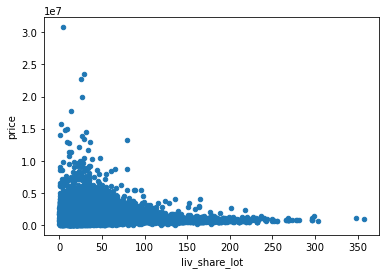

In [84]:
df5.plot.scatter('liv_share_lot','price');

In [85]:
df5['liv_share_lot'].describe()

count    29220.000000
mean        35.471195
std         33.067914
min          0.000918
25%         15.531921
50%         25.579185
75%         44.400386
max        357.333333
Name: liv_share_lot, dtype: float64

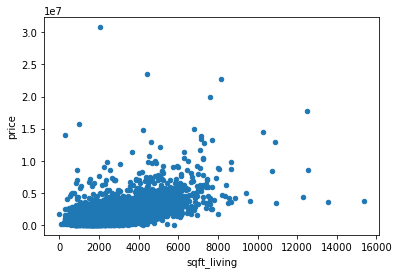

In [86]:
df5.plot.scatter('sqft_living','price');

In [87]:
df5['liv_larger'] = np.where(df5['liv_share_lot'] > 100,1,0)

In [90]:
df5['liv_larger'].value_counts()

0    27669
1     1551
Name: liv_larger, dtype: int64

In [92]:
y = df5['price']
x = df5[['sqft_living','avg_inc']]
model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                 1.670e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:43:50   Log-Likelihood:            -4.3078e+05
No. Observations:               29220   AIC:                         8.616e+05
Df Residuals:                   29217   BIC:                         8.616e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.891e+05   9108.243    -42.718      0.000   -4.07e+05   -3.71e+05
sqft_living   452.3088      3.838    117.858      0.000     444.787     459.831
avg_inc      3655.0189     37.295     98.004      0.000    3581.920    3728.118
==============================================================================
Omnibus:                    48222.856   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        128702536.650
Skew:                          10.568   Prob(JB):                         0.00
Kurtosis:                     327.444   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29220 entries, 0 to 29219
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                29220 non-null  int64         
 1   date              29220 non-null  datetime64[ns]
 2   price             29220 non-null  float64       
 3   bedrooms          29220 non-null  int64         
 4   bathrooms         29220 non-null  float64       
 5   sqft_living       29220 non-null  int64         
 6   sqft_lot          29220 non-null  int64         
 7   floors            29220 non-null  float64       
 8   waterfront        29220 non-null  object        
 9   greenbelt         29220 non-null  object        
 10  nuisance          29220 non-null  object        
 11  view              29220 non-null  object        
 12  condition         29220 non-null  object        
 13  grade             29220 non-null  object        
 14  heat_source       2919

In [123]:
df5.groupby('grade')['price'].mean().sort_values(ascending=False)

grade
13 Mansion       7.399048e+06
12 Luxury        5.088029e+06
11 Excellent     3.546012e+06
10 Very Good     2.343269e+06
9 Better         1.616014e+06
1 Cabin          1.352500e+06
8 Good           1.090233e+06
7 Average        8.223105e+05
6 Low Average    6.556468e+05
4 Low            6.342672e+05
5 Fair           6.211390e+05
3 Poor           4.644615e+05
2 Substandard    3.025000e+05
Name: price, dtype: float64

In [124]:
df5['grade'].value_counts(ascending=False)

7 Average        11554
8 Good            8873
9 Better          3597
6 Low Average     2840
10 Very Good      1352
11 Excellent       402
5 Fair             390
12 Luxury          122
4 Low               49
13 Mansion          24
3 Poor              13
2 Substandard        2
1 Cabin              2
Name: grade, dtype: int64

In [125]:
df5.groupby('grade')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
1 Cabin,2.0,1.352500e+06,1.622810e+06,205000.0,778750.0,1352500.0,1926250.0,2500000.0
10 Very Good,1352.0,2.343269e+06,1.073293e+06,27563.0,1699950.0,2180000.0,2806250.0,8100000.0
11 Excellent,402.0,3.546012e+06,2.319411e+06,310905.0,2267750.0,2950000.0,4068750.0,30750000.0
12 Luxury,122.0,5.088029e+06,3.755127e+06,580000.0,2979625.0,3850000.0,5575000.0,23500000.0
13 Mansion,24.0,7.399048e+06,4.405542e+06,40000.0,4237500.0,6199000.0,8818750.0,17800000.0
2 Substandard,2.0,3.025000e+05,1.378858e+05,205000.0,253750.0,302500.0,351250.0,400000.0
3 Poor,13.0,4.644615e+05,3.886463e+05,80000.0,175000.0,400000.0,640000.0,1515000.0
4 Low,49.0,6.342672e+05,6.653404e+05,114491.0,300000.0,470000.0,730000.0,4550000.0
5 Fair,390.0,6.211390e+05,4.977861e+05,52593.0,400000.0,500000.0,700000.0,5000000.0


In [127]:
df5.loc[(df5['grade'] == '13 Mansion') & (df5['price'] == 40000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,ZIPCODE,N02650,A02650,avg_inc,month,year,month_num,sqft_living_comp,liv_share_lot,liv_larger
1272,1311040040,2022-01-08,40000.0,4,4.5,5780,52101,2.0,NO,NO,...,98074,12890.0,3853447.0,298.948565,1,2022,8,4450,11.093837,0


In [131]:
df5.loc[(df5['grade'] == '1 Cabin')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,ZIPCODE,N02650,A02650,avg_inc,month,year,month_num,sqft_living_comp,liv_share_lot,liv_larger
13102,2923099027,2021-12-13,205000.0,1,0.0,100,25400,1.0,YES,NO,...,98045,8090.0,1184209.0,146.379357,12,2021,7,100,0.393701,0
23879,8046100101,2021-07-22,2500000.0,1,1.0,290,18870,1.0,NO,YES,...,98005,10110.0,2203959.0,217.997923,7,2021,2,290,1.536831,0


In [128]:
df5.groupby('sewer_system')['price'].mean().sort_values(ascending=False)

sewer_system
PUBLIC                1.121683e+06
PRIVATE               1.064000e+06
PUBLIC RESTRICTED     1.042724e+06
PRIVATE RESTRICTED    7.770000e+05
Name: price, dtype: float64

In [130]:
df5.groupby('view')['price'].mean().sort_values(ascending=False)

view
EXCELLENT    2.997397e+06
FAIR         1.753582e+06
GOOD         1.743824e+06
AVERAGE      1.460398e+06
NONE         1.020391e+06
Name: price, dtype: float64

In [132]:
df6 = df5.drop(index=[1272,13102,23879])

In [188]:
view_list_1 = list(df5['view'].unique())
view_list_1

['NONE', 'EXCELLENT', 'AVERAGE', 'GOOD', 'FAIR']

In [140]:
view_list_2 = [0,2,1,1,1]

In [143]:
view_dict = dict(zip(view_list_1,view_list_2))
view_dict

{'NONE': 0, 'EXCELLENT': 2, 'AVERAGE': 1, 'GOOD': 1, 'FAIR': 1}

In [145]:
df6['view_group'] = df6['view'].replace(view_dict)

In [149]:
df5.groupby('condition')['price'].mean().sort_values(ascending=False)

condition
Average      1.142735e+06
Very Good    1.130518e+06
Good         1.053893e+06
Fair         7.853954e+05
Poor         6.576311e+05
Name: price, dtype: float64

In [151]:
cond_list_1 = list(df5['condition'].unique())
cond_list_1

['Average', 'Good', 'Fair', 'Very Good', 'Poor']

In [152]:
cond_list_2 = [1,1,0,1,0]

In [153]:
cond_dict = dict(zip(cond_list_1,cond_list_2))
cond_dict

{'Average': 1, 'Good': 1, 'Fair': 0, 'Very Good': 1, 'Poor': 0}

In [155]:
df6['cond_group'] = df6['condition'].replace(cond_dict)

In [157]:
df6[['cond_group','condition']].head(20)

,cond_group,condition
0,1,Average
1,1,Good
2,1,Good
3,1,Average
4,1,Average
5,1,Average
6,1,Good
7,0,Fair
8,1,Good
9,1,Average


In [159]:
df6.groupby('grade')['price'].mean().sort_values(ascending=False)

grade
13 Mansion       7.719006e+06
12 Luxury        5.088029e+06
11 Excellent     3.546012e+06
10 Very Good     2.343269e+06
9 Better         1.616014e+06
8 Good           1.090233e+06
7 Average        8.223105e+05
6 Low Average    6.556468e+05
4 Low            6.342672e+05
5 Fair           6.211390e+05
3 Poor           4.644615e+05
2 Substandard    3.025000e+05
Name: price, dtype: float64

In [170]:
grade_list = list(df6['grade'].unique())
grade_list_1 = [grade_list[i] for i in [1,3,7,10,11]]
grade_list_1

['6 Low Average', '5 Fair', '4 Low', '3 Poor', '2 Substandard']

In [173]:
grade_list_2 = ['0 Bad']*5
grade_list_2

['0 Bad', '0 Bad', '0 Bad', '0 Bad', '0 Bad']

In [174]:
grade_dict = dict(zip(grade_list_1,grade_list_2))
grade_dict

{'6 Low Average': '0 Bad',
 '5 Fair': '0 Bad',
 '4 Low': '0 Bad',
 '3 Poor': '0 Bad',
 '2 Substandard': '0 Bad'}

In [175]:
df6['grade_group'] = df6['grade'].replace(grade_dict)

In [180]:
df6.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,avg_inc,month,year,month_num,sqft_living_comp,liv_share_lot,liv_larger,view_group,cond_group,grade_group
0,6147650060,2021-06-10,543250.0,4,2.5,2730,4545,2.0,NO,NO,...,89.7321,6,2021,1,2320,60.066007,0,0,1,7 Average
1,2422059158,2021-06-10,632000.0,3,1.0,1150,43200,1.0,NO,NO,...,89.7321,6,2021,1,1150,2.662037,0,0,1,0 Bad
2,3422059068,2021-06-10,801000.0,4,2.5,2320,49658,2.0,NO,NO,...,89.7321,6,2021,1,1530,4.671956,0,0,1,8 Good
3,6699001020,2021-06-10,660000.0,5,2.5,3220,5025,2.0,NO,NO,...,89.7321,6,2021,1,2760,64.079602,0,0,1,8 Good
4,5464350020,2021-06-11,747895.0,4,4.0,3160,4860,2.5,NO,NO,...,89.7321,6,2021,1,2740,65.020576,0,0,1,8 Good


In [177]:
df7 = pd.get_dummies(data = df6,columns = ['waterfront','view_group','cond_group','grade_group','year'],drop_first = True)

In [184]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29217 entries, 0 to 29219
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        29217 non-null  int64         
 1   date                      29217 non-null  datetime64[ns]
 2   price                     29217 non-null  float64       
 3   bedrooms                  29217 non-null  int64         
 4   bathrooms                 29217 non-null  float64       
 5   sqft_living               29217 non-null  int64         
 6   sqft_lot                  29217 non-null  int64         
 7   floors                    29217 non-null  float64       
 8   greenbelt                 29217 non-null  object        
 9   nuisance                  29217 non-null  object        
 10  view                      29217 non-null  object        
 11  condition                 29217 non-null  object        
 12  grade             

In [185]:
y7 = df7['price']
x7 = pd.concat([df7[['avg_inc','sqft_living']],df7.iloc[:,-12:]],axis=1)

In [186]:
model = sm.OLS(y7,sm.add_constant(x7)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3718.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:00:03   Log-Likelihood:            -4.2693e+05
No. Observations:               29217   AIC:                         8.539e+05
Df Residuals:                   29202   BIC:                         8.540e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.593e+05   3.28e+04     -7.901      0.000   -3.24e+05   -1.95e+05
avg_inc                   3285.2802     33.602     97.770      0.000    3219.418    3351.142
sqft_living                267.9949      4.919     54.484      0.000     258.354     277.636
waterfront_YES            6.703e+05   2.84e+04     23.581      0.000    6.15e+05    7.26e+05
view_group_1              1.518e+05   1.08e+04     14.116      0.000    1.31e+05    1.73e+05
view_group_2              8.389e+05   2.76e+04     30.401      0.000    7.85e+05    8.93e+05
cond_group_1              1.301e+05    3.2e+04      4.068      0.000    6.74e+04    1.93e+05
grade_group_10 Very Good  5.027e+05   2.18e+04     23.080      0.000     4.6e+05    5.45e+05
grade_group_11 Excellent  1.211e+06   3.35e+04     36.184      0.000    1.15e+06    1.28e+06
grade_group_12 Luxury     2.164e+06   5.49e+04     39.389      0.000    2.06e+06    2.27e+06
grade_group_13 Mansion    4.209e+06   1.18e+05     35.763      0.000    3.98e+06    4.44e+06
grade_group_7 Average    -1.351e+04    1.1e+04     -1.226      0.220   -3.51e+04    8099.020
grade_group_8 Good        2.622e+04   1.23e+04      2.131      0.033    2104.947    5.03e+04
grade_group_9 Better      2.286e+05   1.58e+04     14.510      0.000    1.98e+05    2.59e+05
year_2022                 1.733e+05   6544.660     26.482      0.000     1.6e+05    1.86e+05
==============================================================================
Omnibus:                    47564.763   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        151718554.546
Skew:                          10.175   Prob(JB):                         0.00
Kurtosis:                     355.439   Cond. No.                     8.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29217 entries, 0 to 29219
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        29217 non-null  int64         
 1   date                      29217 non-null  datetime64[ns]
 2   price                     29217 non-null  float64       
 3   bedrooms                  29217 non-null  int64         
 4   bathrooms                 29217 non-null  float64       
 5   sqft_living               29217 non-null  int64         
 6   sqft_lot                  29217 non-null  int64         
 7   floors                    29217 non-null  float64       
 8   greenbelt                 29217 non-null  object        
 9   nuisance                  29217 non-null  object        
 10  view                      29217 non-null  object        
 11  condition                 29217 non-null  object        
 12  grade             